In [ ]:
# -*- coding: utf-8 -*-
__author__ = 'Guilherme Cardoso de Vargas'
__version__ = 1.0
__maintainer__ = 'Guilherme Cardoso de Vargas'
__email__ = 'vargas93626@gmail.com'
__status__ = 'Development'

In [ ]:
#Upar arquivo para o google colab
from google.colab import files
uploaded = files.upload() 

Saving Cópia de Exames Projeto KAYAPÓ - Página1.csv to Cópia de Exames Projeto KAYAPÓ - Página1.csv


In [ ]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv(io.StringIO(uploaded['Cópia de Exames Projeto KAYAPÓ - Página1.csv'].decode('utf-8'))) #Lê o csv upado


df[['capsulelot','exame','idade','begintime','result_igg','result_igm', 'sexo']]


,capsulelot,exame,idade,begintime,result_igg,result_igm,sexo
0,COVAL200727,COVID-19 IgG e IgM,67.0,2020-11-22 20:50:29.483,True,False,male
1,COVAL200727,COVID-19 IgG e IgM,27.0,2020-11-23 15:49:36.739,False,True,female
2,COVAL200727,COVID-19 IgG e IgM,25.0,2020-11-19 18:55:51.017,False,True,male
3,COVAL200727,COVID-19 IgG e IgM,23.0,2020-11-19 18:54:11.541,False,False,male
4,COVAL200727,COVID-19 IgG e IgM,37.0,2020-11-19 18:55:16.771,True,False,female
...,...,...,...,...,...,...,...
114,COVAL200727,COVID-19 IgG e IgM,10.0,2020-11-23 15:53:33.094,False,False,female
115,COVAL200727,COVID-19 IgG e IgM,54.0,2020-11-23 15:55:10.337,False,False,female
116,COVAL200727,COVID-19 IgG e IgM,66.0,2020-11-22 20:50:17.246,True,True,female
117,COVAL200727,COVID-19 IgG e IgM,13.0,2020-11-18 20:42:45.223,True,False,female


In [ ]:
df.describe()

,idade
count,119.000000
mean,30.487395
std,19.740205
min,0.000000
25%,14.500000
50%,29.000000
75%,41.000000
max,80.000000


In [ ]:
#Total de exames
total_exames = df.shape[0] #Count rows

#Total Reagentes
df_reagentes = df.apply(lambda x: True if x['result_igm'] == True or x['result_igg'] == True else False, axis = 1) #filtra os resultados IgG ou IgM reagentes
total_reagentes = len(df_reagentes[df_reagentes == True].index) # Conta os idex que estão no range da função apply

#Total Não Reagentes 
df_N_reagentes = df.apply(lambda x: True if x['result_igm'] == False and x['result_igg'] == False else False, axis = 1)
total_N_reagentes = len(df_N_reagentes[df_N_reagentes == True].index)


print(' Total de exames: ',total_exames,'\n Total exames reagentes: ',total_reagentes, '\n Total exames não reagentes:', total_N_reagentes) #\n quebra de linha

 Total de exames:  119 
 Total exames reagentes:  88 
 Total exames não reagentes: 31


In [ ]:
df_mulheres = df.apply(lambda x: True if x['sexo'] == 'female' else False, axis = 1)
total_mulheres = len (df_mulheres[df_mulheres == True].index)


df_homens =  df.apply(lambda x: True if x['sexo'] == 'male' else False, axis = 1)
total_homens = len (df_homens[df_homens == True].index)

print("Total de mulheres:", total_mulheres, "\nTotal de Homens: ", total_homens)

Total de mulheres: 72 
Total de Homens:  47


In [ ]:
#Mulheres Reagentes por Imunoblobulina
df_igm_reg_sexF = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == True and x['result_igg'] == False) else False, axis = 1)
total_sexF_igm_reg = len(df_igm_reg_sexF[df_igm_reg_sexF == True].index)

df_igg_reg_sexF = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == False and x['result_igg'] == True) else False, axis = 1) 
total_sexF_igg_reg = len(df_igg_reg_sexF[df_igg_reg_sexF == True].index)

df_reg_gm_sexF = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == True and x['result_igg'] == True) else False, axis = 1) 
total_reg_gm_sexF = len(df_reg_gm_sexF[df_reg_gm_sexF == True].index)

#Homens Reagentes por Imunoblobulina
df_igm_reg_sexM = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == True and x['result_igg'] == False) else False, axis = 1) 
total_sexM_igm_reg = len(df_igm_reg_sexM[df_igm_reg_sexM == True].index)

df_igg_reg_sexM = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == False and x['result_igg'] == True) else False, axis = 1) 
total_sexM_igg_reg = len(df_igg_reg_sexM[df_igg_reg_sexM == True].index)

df_reg_gm_sexM = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == True and x['result_igg'] == True) else False, axis = 1) 
total_reg_gm_sexM = len(df_reg_gm_sexM[df_reg_gm_sexM == True].index)


print("Total reagentes IgM Mulheres:", total_sexF_igm_reg, "\nTotal reagentes IgG Mulheres:", total_sexF_igg_reg,'\nTotal Ambos reagentes Mulheres: ',total_reg_gm_sexF, '\n')

print('Total reagentes IgM Homens:',total_sexM_igm_reg,'\nTotal reagentes IgG Homens:',total_sexM_igg_reg,'\nTotal Ambos reagentes Homens: ',total_reg_gm_sexM, '\n' )

Total reagentes IgM Mulheres: 19 
Total reagentes IgG Mulheres: 13 
Total Ambos reagentes Mulheres:  19 

Total reagentes IgM Homens: 21 
Total reagentes IgG Homens: 5 
Total Ambos reagentes Homens:  11 



In [ ]:
#Mulheres Reagentes
df_reg_sexF = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == True or x['result_igg'] == True) else False, axis = 1) 
total_reg_sexF = len(df_reg_sexF[df_reg_sexF == True].index)

#Homens Reagentes 
df_reg_sexM = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == True or x['result_igg'] == True) else False, axis = 1) 
total_reg_sexM = len(df_reg_sexM[df_reg_sexM == True].index)

#Mulheres Não Reagentes
df_neg_sexF = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == False and x['result_igg'] == False) else False, axis = 1) 
total_neg_sexF = len(df_neg_sexF[df_neg_sexF == True].index)

#Homens Não Reagentes 
df_neg_sexM = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == False and  x['result_igg'] == False) else False, axis = 1) 
total_neg_sexM = len(df_neg_sexM[df_neg_sexM == True].index)

print("Total Mulheres Regentes:", total_reg_sexF)
print("Total Mulheres Não Regentes:", total_neg_sexF)

print("\nTotal Homens  Regentes:", total_reg_sexM)
print("Total Homens Não Regentes:", total_neg_sexM)

Total Mulheres Regentes: 51
Total Mulheres Não Regentes: 21

Total Homens  Regentes: 37
Total Homens Não Regentes: 10


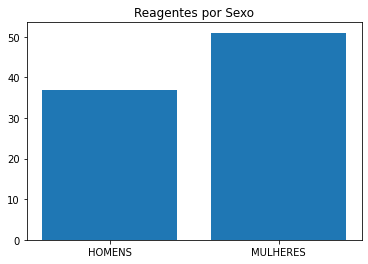

In [ ]:
#Plotando gráfico Reagentes ( Eixo_X, Eixo_Y)

x = ["HOMENS", "MULHERES"] #nomeia os eixos x 
y= [total_reg_sexM, total_reg_sexF] #Atribui valores ao eixo y

plt.bar(x,y)
plt.title("Reagentes por Sexo")
plt.show()

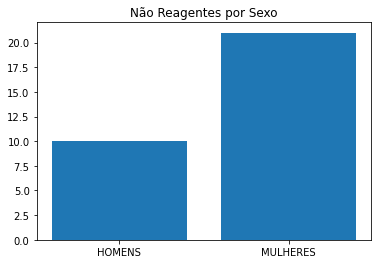

In [ ]:
#Plotando gráfico NÃO Reagentes

x = ["HOMENS", "MULHERES"] #nomeia os eixos x 
y= [total_neg_sexM, total_neg_sexF] #Atribui valores ao eixo y

plt.bar(x,y)
plt.title("Não Reagentes por Sexo")
plt.show()

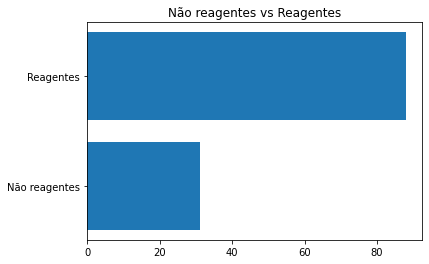

In [ ]:
#Gráfico Não reagentes vs Reagentes

x = ["Não reagentes", "Reagentes"]
y= [total_N_reagentes, total_reagentes] 

plt.barh(x,y)
plt.title("Não reagentes vs Reagentes")
plt.show()

In [ ]:
#Mulheres Jovens Reagentes
reg_sexF_Jovens = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == True or x['result_igg'] == True) and (x['idade'] >= 0 and x['idade'] <= 19 ) else False, axis = 1) 
total_reg_sexF_Jovens = len(reg_sexF_Jovens[reg_sexF_Jovens == True].index)

#Mulheres Adultas Reagentes
reg_sexF_Adult = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == True or x['result_igg'] == True) and (x['idade'] > 19 and x['idade'] < 60 ) else False, axis = 1) 
total_reg_sexF_Adult = len(reg_sexF_Adult[reg_sexF_Adult == True].index)

#Mulheres Idosas Reagentes
reg_sexF_Idosa = df.apply(lambda x: True if x['sexo'] == 'female' and (x['result_igm'] == True or x['result_igg'] == True) and (x['idade'] > 59  ) else False, axis = 1) 
total_reg_sexF_Idosa = len(reg_sexF_Idosa[reg_sexF_Idosa == True].index)


print('Mulheres Jovens Reagentes: ',total_reg_sexF_Jovens, '\nMulheres Adultas Reagentes: ', total_reg_sexF_Adult, '\nMulheres Idosas Reagentes: ' , total_reg_sexF_Idosa)



Mulheres Jovens Reagentes:  14 
Mulheres Adultas Reagentes:  31 
Mulheres Idosas Reagentes:  6


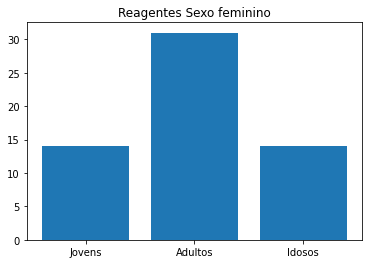

In [ ]:
x = ["Jovens", "Adultos", "Idosos"]
y = [total_reg_sexF_Jovens, total_reg_sexF_Adult, total_reg_sexF_Jovens]

plt.bar(x,y)
plt.title("Reagentes Sexo feminino")
plt.show()

In [ ]:
#Homens Jovens Reagentes
reg_sexM_Jovens = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == True or x['result_igg'] == True) and (x['idade'] < 20 ) else False, axis = 1) 
total_reg_sexM_Jovens = len(reg_sexM_Jovens[reg_sexM_Jovens == True].index)

#Homens Adultas Reagentes
reg_sexM_Adult = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == True or x['result_igg'] == True) and (x['idade'] > 19 and x['idade'] < 60 ) else False, axis = 1) 
total_reg_sexM_Adult = len(reg_sexM_Adult[reg_sexM_Adult == True].index)

#Homens Idosas Reagentes
reg_sexM_Idoso = df.apply(lambda x: True if x['sexo'] == 'male' and (x['result_igm'] == True or x['result_igg'] == True) and (x['idade'] > 59  ) else False, axis = 1) 
total_reg_sexM_Idoso = len(reg_sexM_Idoso[reg_sexM_Idoso == True].index)


print('Homens Jovens Reagentes: ',total_reg_sexM_Jovens, '\nHomens Adultos Reagentes: ', total_reg_sexM_Adult, '\nHomens Idosos Reagentes: ' , total_reg_sexM_Idoso)


Homens Jovens Reagentes:  12 
Homens Adultos Reagentes:  21 
Homens Idosos Reagentes:  4


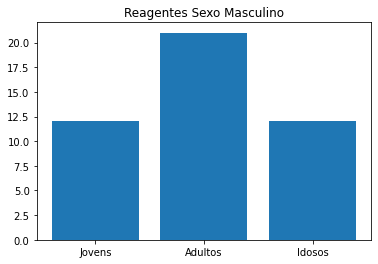

In [ ]:
x = ["Jovens", "Adultos", "Idosos"]
y = [total_reg_sexM_Jovens, total_reg_sexM_Adult, total_reg_sexM_Jovens]

plt.bar(x,y)
plt.title("Reagentes Sexo Masculino")
plt.show()

In [ ]:
PorcentM = total_reg_sexM/total_homens *100
PorcentF = total_reg_sexF/total_mulheres*100
PorcentNeg = total_N_reagentes /total_exames*100

print('\n-Reagentes Masculinos(%):',PorcentM,'\n-Reagentes Feminino(%):',PorcentF,'\n-Não Reagentes(%):',PorcentNeg)


-Reagentes Masculinos(%): 78.72340425531915 
-Reagentes Feminino(%): 70.83333333333334 
-Não Reagentes(%): 26.05042016806723


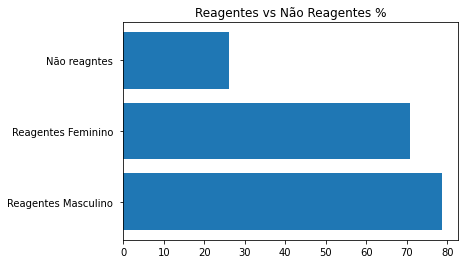

In [ ]:
x = ["Reagentes Masculino ", "Reagentes Feminino ", "Não reagntes "]
y = [PorcentM, PorcentF, PorcentNeg]

plt.barh(x,y)
plt.title("Reagentes vs Não Reagentes %")
plt.show()


In [ ]:
#IgM
df_igm_reg = df.apply(lambda x: True if x['result_igm'] == True and x['result_igg'] == False and (x['sexo']=='male' or x['sexo']=='female') else False, axis = 1)
total_igm_reg = len(df_igm_reg[df_igm_reg == True].index)

#IgG
df_igg_reg = df.apply(lambda x: True if x['result_igm'] == False and x['result_igg'] == True else False, axis = 1) 
total_igg_reg = len(df_igg_reg[df_igg_reg == True].index)

#IgM e IgG
df_ambos_reg = df.apply(lambda x: True if x['result_igm'] == True and x['result_igg'] == True else False, axis = 1) 
total_ambos_reg = len(df_ambos_reg[df_ambos_reg == True].index)

#Percentual reagente por imunoblobulina
PorcentIgM = (total_igm_reg/total_exames)*100
PorcentIgG = (total_igg_reg/total_exames)*100
PorcentAmbos = (total_ambos_reg /total_exames)*100

print('\n-Reagentes IgM(%):',PorcentIgM,'\n-Reagentes IgG(%):',PorcentIgG,'\n-Ambos Reagentes(%):',PorcentAmbos)



-Reagentes IgM(%): 33.61344537815126 
-Reagentes IgG(%): 15.126050420168067 
-Ambos Reagentes(%): 25.210084033613445


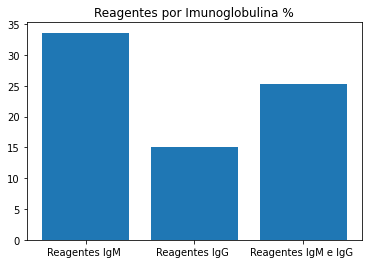

In [ ]:
x = ["Reagentes IgM ", "Reagentes IgG ", "Reagentes IgM e IgG "]
y = [PorcentIgM, PorcentIgG, PorcentAmbos]

plt.bar(x,y)
plt.title("Reagentes por Imunoglobulina %")
plt.show()


In [ ]:

#Percentual reagente por faixa etária 
PctJovenFem = (total_reg_sexF_Jovens/total_exames)*100
PctAdulFem = (total_reg_sexF_Adult/total_exames)*100
PctIdosFem = (total_reg_sexF_Idosa /total_exames)*100

print('\n-Reagentes Jovens(%):',PctJovenFem,'\n-Reagentes Adultas(%):',PctAdulFem,'\n-Reagentes Idosas(%):',PctIdosFem)



-Reagentes Jovens(%): 11.76470588235294 
-Reagentes Adultas(%): 26.05042016806723 
-Reagentes Idosas(%): 5.042016806722689


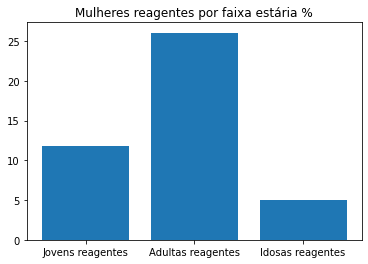

In [ ]:
x = ["Jovens reagentes", "Adultas reagentes","Idosas reagentes"]
y = [PctJovenFem, PctAdulFem, PctIdosFem]

plt.bar(x,y)
plt.title("Mulheres reagentes por faixa estária %")
plt.show()

In [ ]:
#Percentual reagente por faixa etária 
PctJovenMasc = total_reg_sexM_Jovens/total_exames*100
PctAdulMasc = total_reg_sexM_Adult/total_exames*100
PctIdosMasc = total_reg_sexM_Idoso /total_exames*100

print('\n-Reagentes Jovens(%):',PctJovenMasc,'\n-Reagentes Adultos(%):',PctAdulMasc,'\n-Reagentes Idosos(%):',PctIdosMasc)




-Reagentes Jovens(%): 10.084033613445378 
-Reagentes Adultos(%): 17.647058823529413 
-Reagentes Idosos(%): 3.361344537815126


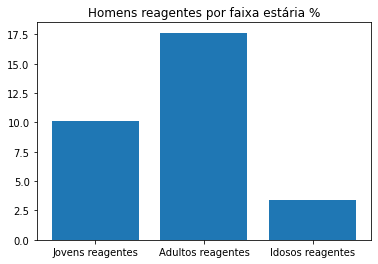

In [ ]:
x = ["Jovens reagentes", "Adultos reagentes","Idosos reagentes"]
y = [PctJovenMasc, PctAdulMasc, PctIdosMasc]

plt.bar(x,y)
plt.title("Homens reagentes por faixa estária %")
plt.show()

In [ ]:
#Mulheres Jovens 
EX_sexF_Jovens = df.apply(lambda x: True if x['sexo'] == 'female' and (x['idade'] <= 19 ) else False, axis = 1) 
total_ex_sexF_Jovens = len(EX_sexF_Jovens[EX_sexF_Jovens == True].index)

#Mulheres Adultas 
EX_sexF_Adult = df.apply(lambda x: True if x['sexo'] == 'female' and (x['idade'] > 19 and x['idade'] < 60 ) else False, axis = 1) 
total_ex_sexF_Adult = len(EX_sexF_Adult[EX_sexF_Adult == True].index)

#Mulheres Idosas 
EX_sexF_Idosa = df.apply(lambda x: True if x['sexo'] == 'female' and (x['idade'] > 59  ) else False, axis = 1) 
total_ex_sexF_Idosa = len(EX_sexF_Idosa[EX_sexF_Idosa == True].index)


print('***TOTAL EXAMES***', '\nMulheres Jovens : ',total_ex_sexF_Jovens, '\nMulheres Adultas : ', total_ex_sexF_Adult, '\nMulheres Idosas : ' , total_ex_sexF_Idosa)


***TOTAL EXAMES*** 
Mulheres Jovens :  25 
Mulheres Adultas :  40 
Mulheres Idosas :  7


In [ ]:
#Mulheres Jovens 
EX_sexM_Jovens = df.apply(lambda x: True if x['sexo'] == 'male' and (x['idade'] <= 19 ) else False, axis = 1) 
total_ex_sexM_Jovens = len(EX_sexM_Jovens[EX_sexM_Jovens == True].index)

#Mulheres Adultas 
EX_sexM_Adult = df.apply(lambda x: True if x['sexo'] == 'male' and (x['idade'] > 19 and x['idade'] < 60 ) else False, axis = 1) 
total_ex_sexM_Adult = len(EX_sexM_Adult[EX_sexM_Adult == True].index)

#Mulheres Idosas 
EX_sexM_Idoso = df.apply(lambda x: True if x['sexo'] == 'male' and (x['idade'] > 59  ) else False, axis = 1) 
total_ex_sexM_Idoso = len(EX_sexM_Idoso[EX_sexM_Idoso == True].index)


print('***TOTAL EXAMES***', '\nHomens Jovens : ',total_ex_sexM_Jovens, '\nHomens Adultos : ', total_ex_sexM_Adult, '\nHomens Idosos : ' , total_ex_sexM_Idoso)


***TOTAL EXAMES*** 
Homens Jovens :  14 
Homens Adultos :  29 
Homens Idosos :  4


In [ ]:
#Idosos reagentes
EX_reg_idoso = df.apply(lambda x: True if (x['sexo'] == 'male' or x['sexo'] == 'female') and ( x['result_igm'] == True or x['result_igg'] == True ) and (x['idade'] > 59) else False, axis = 1) 
total_reg_idoso = len(EX_reg_idoso[EX_reg_idoso == True].index)

print(total_reg_idoso)


10
